In [9]:
#使用多分类的逻辑回归和正则化处理来实现手写数字识别
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/mydata/', one_hot=True)#导入mnist数据集

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /mydata/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /mydata/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /mydata/t10k-images-idx3-ubyte.gz
Extracting /mydata/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [10]:
#获取原始训练集和标签
train_image_ori = mnist.train.images
train_label_ori = mnist.train.labels

In [11]:
#查看数据维度
print(train_image_ori.shape)#55000个训练样本，784个特征
print(train_label_ori.shape)#55000个训练样本，10个特征

(55000, 784)
(55000, 10)


In [12]:
#增加样本特征
tmp = np.ones((train_image_ori.shape[0],1))
train_image = np.c_[tmp,train_image_ori]
print(train_image.shape)#55000个训练样本，785个特征

(55000, 785)


In [13]:
#生成十个模型的参数
Theta = np.zeros((785,10))

In [14]:
train_label = np.zeros((10,55000))
#针对每个模型设置标签
for j in range(10):
    for i in range(train_label_ori.shape[0]):
        if(train_label_ori[i][j]!=0.0):
            train_label[j][i]=1
#其实就是原标签的转置

In [15]:
#设置sigmoid函数
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [16]:
#计算损失函数，带正则化
def costfunction(x,theta,y,lam):
    pre = sigmoid(np.dot(theta.T,x.T))
    k = np.log(pre)
    costori = np.dot(y,k)+np.dot(1-y,np.log(1-pre))
    reg = 0.5*lam*np.sum(np.power(theta[1:],2))
    m = x.shape[0]
    return pre,(-1/m)*(costori-reg)

In [17]:
#进行梯度下降
def graident_decent(x,theta,y,pre,lam,learning_rate):
    tmp = theta.copy()
    tmp[0] = 0
    dtheta = (1/x.shape[0])*np.dot((pre-y),x)+(1/x.shape[0])*lam*tmp
    theta = theta-learning_rate*dtheta
    return theta

In [18]:
#引入测试集，并进行数据预处理
test_image_ori = mnist.test.images
test_label_ori = mnist.test.labels
tmp = np.ones((test_image_ori.shape[0],1))
test_image = np.c_[tmp,test_image_ori]

In [19]:
#将标签转为具体数据
idx2 = np.argmax(test_label_ori,axis=1)

In [20]:
#计算预测准确率
def accuracy(idx,idx2):
    slove=(idx==idx2)
    return np.sum(slove)/idx.shape[0]

In [21]:
#进行梯度下降，同时训练十个模型
accu = []
for j in range(10):
    theta = Theta[:,j]
    print(j)
    for i in range(100):
        pre,cost = costfunction(train_image,theta,train_label[j],0.01)
        theta = graident_decent(train_image,theta,train_label[j],pre,0.01,0.001)
        Theta[:,j]=theta
        test_o = np.dot(test_image,Theta)
        idx = np.argmax(test_o, axis=1)
        accu.append(accuracy(idx,idx2))

0
1
2
3
4
5
6
7
8
9


In [22]:
#查看最终结果
test_o = np.dot(test_image,Theta)
idx = np.argmax(test_o, axis=1)
print(np.sum(idx==idx2)/idx.shape[0])

0.7214


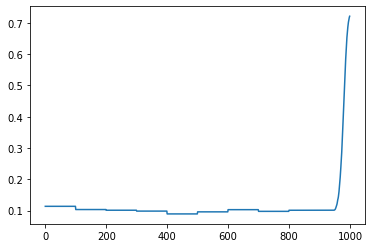

In [25]:
#绘图
plt.plot(accu)